<a href="https://colab.research.google.com/github/luisroliveira/Infraestrutra-de-Software/blob/main/projetoEstatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Investigando agentes que influenciem a ocorrência de Diabetes entre os Akimel O’odham**

Kaylane Gonçalves Lira (kgl@cin.ufpe.br)

Luís Felipe Rodrigues de Oliveira (lfro2@cin.ufpe.br)

Pedro Nascimento Coelho (pnc2@cin.ufpe.br)

Thiago Ramalho Magalhães (trm4@cin.ufpe.br)


# Configuração:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import RocCurveDisplay

In [ ]:
urlDataset = 'https://raw.githubusercontent.com/kaylanelira/AED-CID-Diabetes/main/diabetes.csv'
diabetesTable = pd.read_csv(urlDataset)

In [ ]:
display(diabetesTable)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
table = diabetesTable.to_numpy()
table = table.T

columns = {'Pregnancies': table[0], 'Glucose': table[1], 'BloodPressure': table[2], 'SkinThickness': table[3], 'Insulin': table[4], 'BMI': table[5],
          'DiabetesPedigreeFunction': table[6], 'Age': table[7], 'Outcome': table[8]}

dFrame = pd.DataFrame(columns)
print(dFrame)



     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                

# Perfil dos dados:

Para um melhor entendimento do Dataset, vamos descobrir a quantidade de diabéticos (1) e de não diabéticos (0).

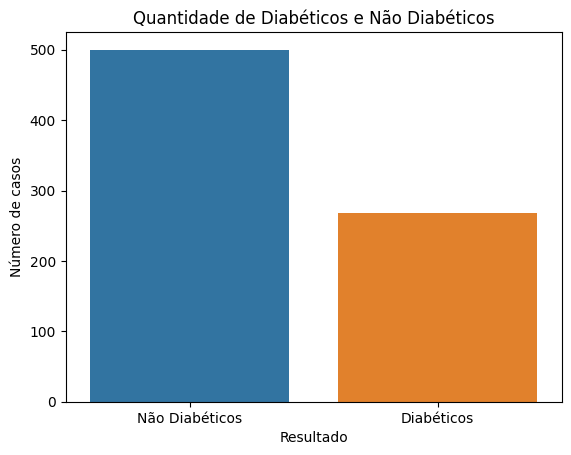

Outcome
0.0    500
1.0    268
dtype: int64

In [ ]:
sns.countplot(x='Outcome', data=dFrame)

values_x = [0, 1]
labels_x = ["Não Diabéticos", "Diabéticos"]
plt.xticks(values_x, labels_x)

plt.title('Quantidade de Diabéticos e Não Diabéticos')
plt.xlabel('Resultado')
plt.ylabel('Número de casos')

plt.show()
dFrame.value_counts('Outcome')

# Outliers:

Verificando se o Dataset escolhido possui outliers:



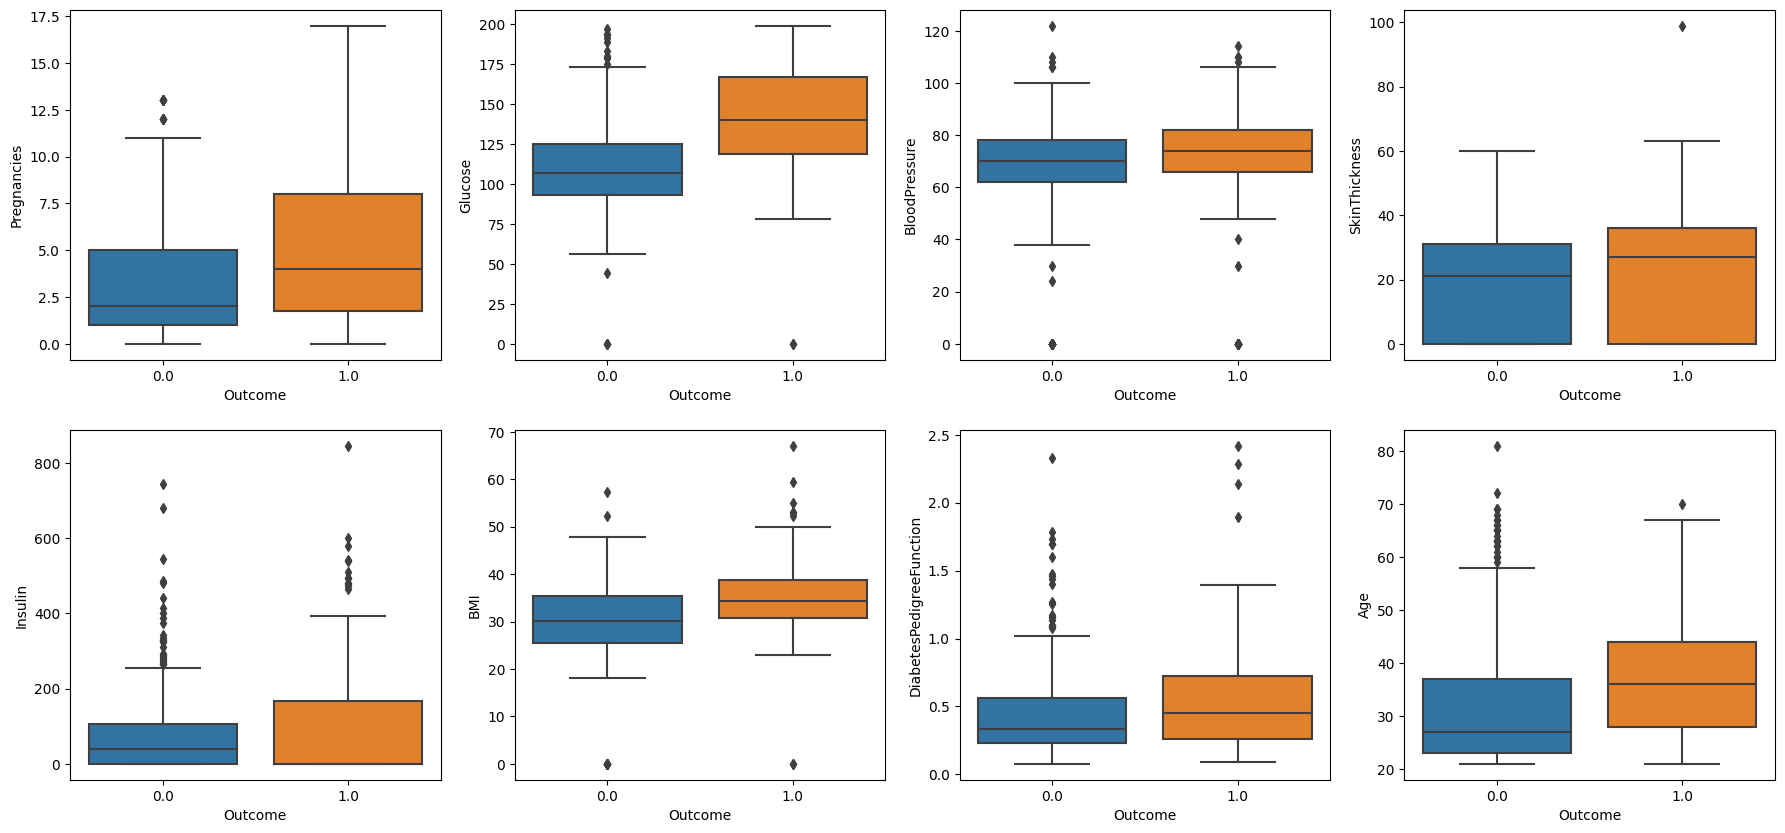

In [ ]:
num_rows = 2
num_columns = 4
y_labels_b = dFrame.columns[:8]


fig_b, axs_b = plt.subplots(num_rows, num_columns, figsize = (22, 10))

for i, column in enumerate(y_labels_b):
  sns.boxplot(ax = axs_b[divmod(i, num_columns)], data = dFrame, x = 'Outcome', y = column)


Observando os gráficos cuidadosamente, podemos concluir que alguns dados seriam inviáveis, como possuir o Índice de Glucose ou o Índice de Massa Corpórea ou a Pressão Sanguínea igual a zero.

**Remoção dos outliers:**

*1) Retirando outliers utilizando função:*

Definindo função para calcular o limite de detecção de outliers, utilizando o intervalo interquartílico, dado pela distância entre o primeiro e o terceiro quartil.

In [ ]:
def outlier_treatment(column):
 #cálculo do primeiro e terceiro quartil
 Q1 = np.percentile(dFrameCopy[column], 25)
 Q3 = np.percentile(dFrameCopy[column], 75)

 IQR = Q3 - Q1
 lowerRange = Q1 - (1.5 * IQR)
 upperRange = Q3 + (1.5 * IQR)
 return lowerRange, upperRange

Removendo e printando boxplots sem os outliers

In [ ]:
dFrameCopy = dFrame.copy()

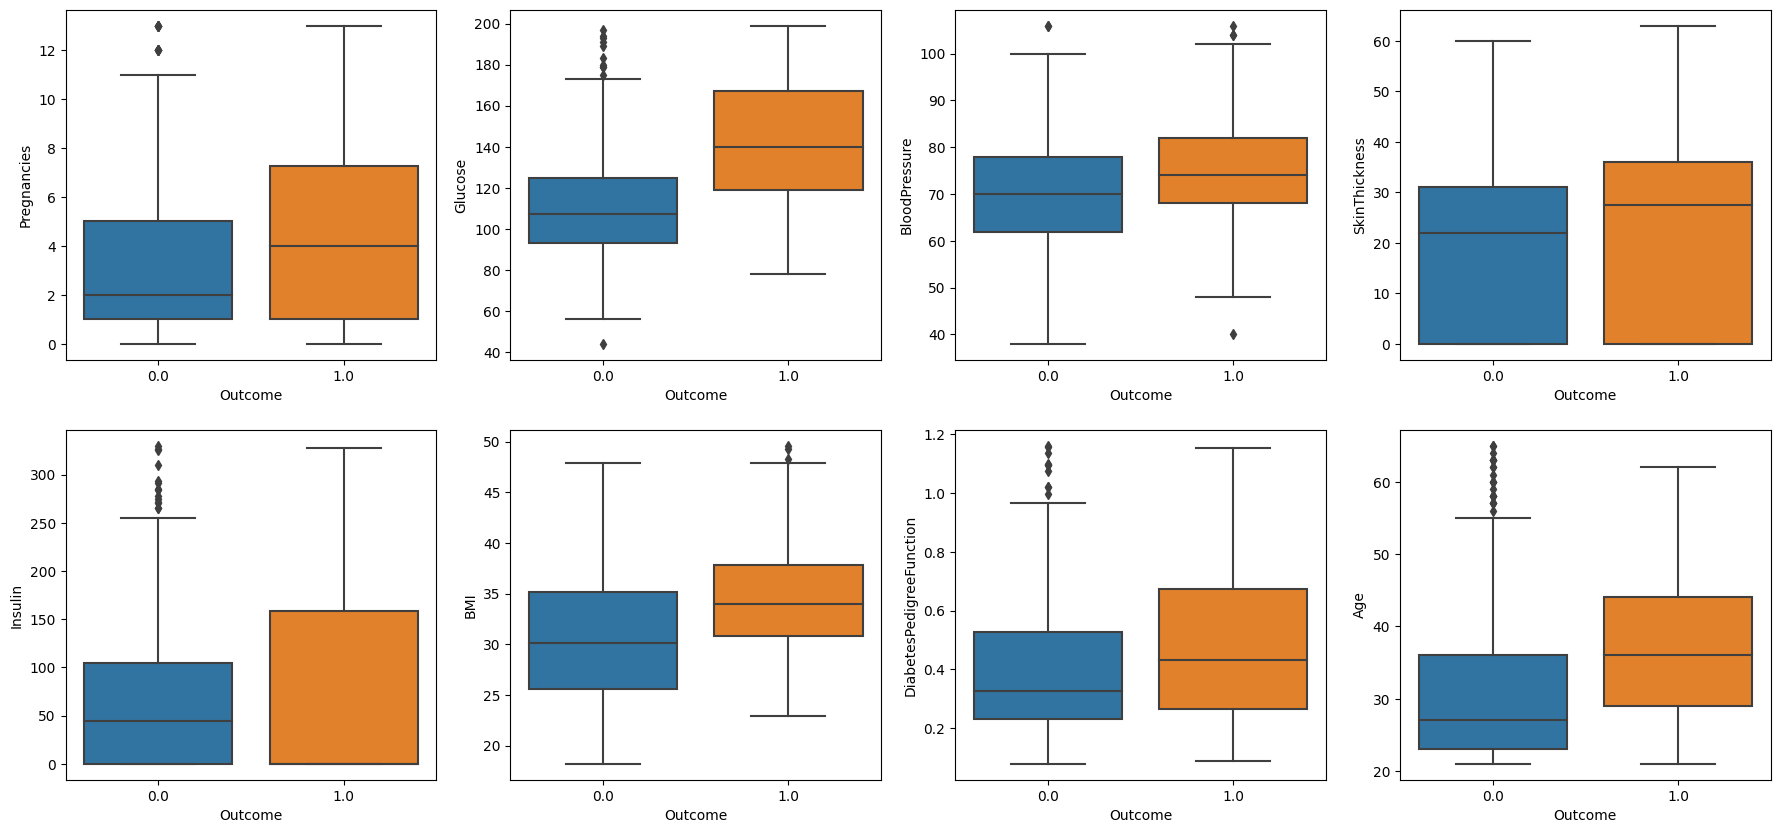

In [ ]:
num_rows = 2
num_columns = 4
y_labels_b = dFrameCopy.columns[:8]
fig_b, axs_b = plt.subplots(num_rows, num_columns, figsize = (22, 10))

for i, column in enumerate(y_labels_b):
  lowerbound,upperbound = outlier_treatment(column)
  dFrameCopy[(dFrameCopy[column] < lowerbound) | (dFrameCopy[column]> upperbound)]

  # Removendo outliers
  dFrameCopy = dFrameCopy.drop(dFrameCopy[ (dFrameCopy[column] > upperbound) | (dFrameCopy[column] < lowerbound) ].index)

  # plotando boxplot
  sns.boxplot(ax = axs_b[divmod(i, num_columns)], data = dFrameCopy, x = 'Outcome', y = column)

*2) Removendo apenas valores atípicos (por exemplo, pressão sanguínea zerada):*

Fazendo uma cópia do Data Frame para retirar os outlier.

In [ ]:
dFrameCopy = dFrame.copy()

In [ ]:
# Remoção das pessoas com 'BloodPressure' == 0
dFrameCopy = dFrame.loc[dFrame['BloodPressure'] > 0]
# Remoção das pessoas com 'Glucose' == 0
dFrameCopy = dFrameCopy.loc[dFrame['Glucose'] > 0]
# Remoção das pessoas com 'BMI' == 0
dFrameCopy = dFrameCopy.loc[dFrame['BMI'] > 0]
dFrameCopy.shape

(724, 9)

Plotando os gráficos sem os valores atípicos para retratar a diferença entre ambos.

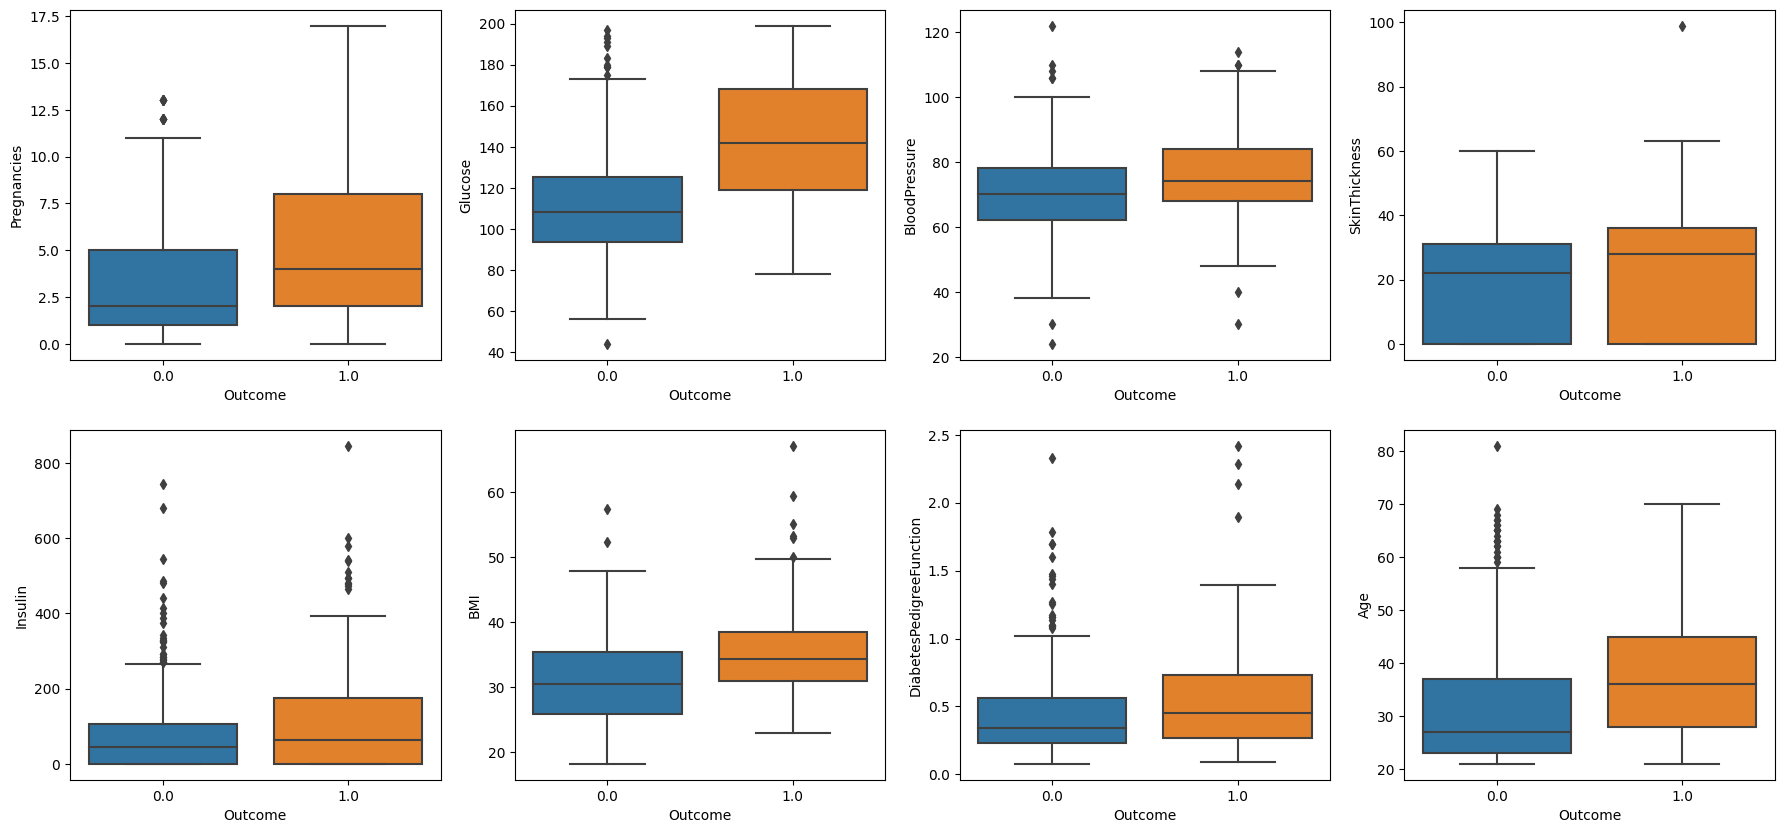

In [ ]:
num_rows = 2
num_columns = 4
y_labels_b = dFrameCopy.columns[:8]


fig_b, axs_b = plt.subplots(num_rows, num_columns, figsize = (22, 10))

for i, column in enumerate(y_labels_b):
  sns.boxplot(ax = axs_b[divmod(i, num_columns)], data = dFrameCopy, x = 'Outcome', y = column)

# **Análise exploratória dos dados**

# Representação gráfica para cada característica do modelo.

Apresentando as variáveis utilizadas em forma de histograma

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

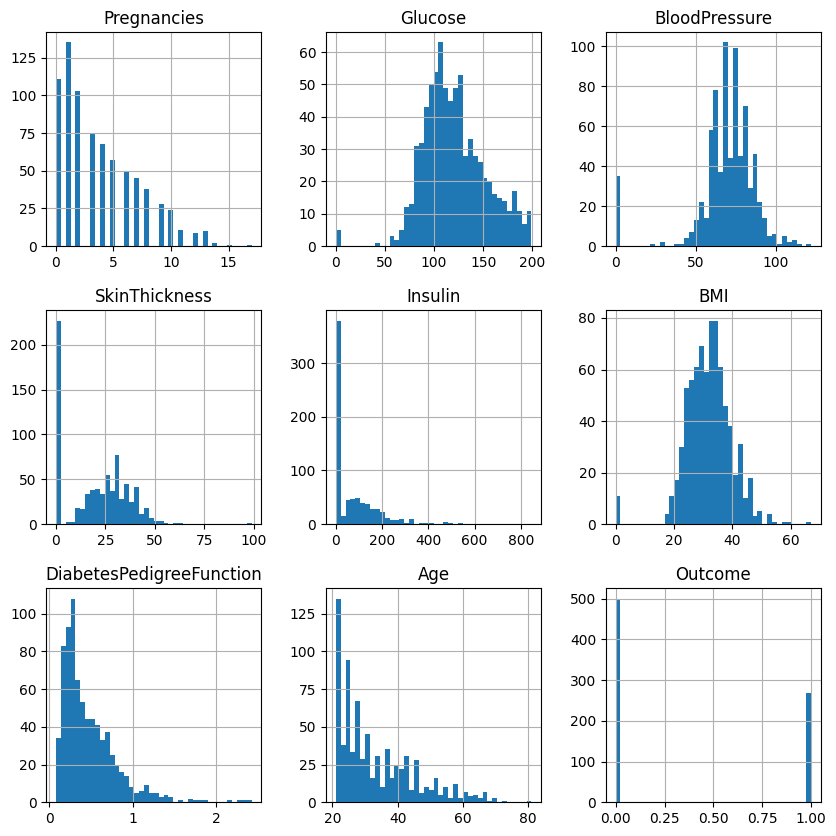

In [ ]:
dFrame.hist(bins=40, figsize=(10,10))

## Gráficos

In [ ]:
#Colocando os dados das pessoas diabéticas (outcome == 1) em dFramePositive
dFramePositive = dFrameCopy.loc[dFrameCopy['Outcome'] == 1.0]

#Colocando os dados das pessoas não diabéticas (outcome == 0) em dFrameNegative
dFrameNegative = dFrameCopy.loc[dFrameCopy['Outcome'] == 0.0]


Definindo funções que utilizaremos para plotar os gráficos de barras

In [ ]:
# Função para plotar gráfico em barras
def plotDisplot(column, titulo, xlab, ylab):
  sns.displot(dFrameCopy[column],height=3, kde=True)
  media = dFrameCopy[column].mean()
  desvioPadrao = dFrameCopy[column].std(ddof=0)
  mediaMenos = media - desvioPadrao
  mediaMais = media + desvioPadrao

  plt.axvline(media, 0, 1, color='r', **{'ls':'-'})
  plt.axvline(mediaMenos, 0, 1, color='b', **{'ls':'--'})
  plt.axvline(mediaMais, 0, 1, color='b', **{'ls':'--'})
  plt.title(titulo)
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.show()

# Plota gráfico de barras com diagnóstico positivo
def plotDisplotPositive(column, titulo, xlab):
  sns.displot(dFramePositive[column],height=3, kde=True)

  media = dFramePositive[column].mean()
  desvioPadrao = dFramePositive[column].std(ddof=0)
  mediaMenos = media - desvioPadrao
  mediaMais = media + desvioPadrao

  plt.axvline(media, 0, 1, color='r', **{'ls':'-'})
  plt.axvline(mediaMenos, 0, 1, color='b', **{'ls':'--'})
  plt.axvline(mediaMais, 0, 1, color='b', **{'ls':'--'})
  plt.title(titulo)
  plt.xlabel(xlab)
  plt.ylabel('Diagnósticos positivos')
  plt.show()
  print(f'Média: {round(media, 3)}')
  print(f'Desvio padrão: {round(desvioPadrao, 3)}')

# Plota gráfico de barras com diagnóstico negativo
def plotDisplotNegative(column, titulo, xlab):
  sns.displot(dFrameNegative[column],height=3, kde=True)

  media = dFrameNegative[column].mean()
  desvioPadrao = dFrameNegative[column].std(ddof=0)
  mediaMenos = media - desvioPadrao
  mediaMais = media + desvioPadrao

  plt.axvline(media, 0, 1, color='r', **{'ls':'-'})
  plt.axvline(mediaMenos, 0, 1, color='b', **{'ls':'--'})
  plt.axvline(mediaMais, 0, 1, color='b', **{'ls':'--'})
  plt.title(titulo)
  plt.xlabel(xlab)
  plt.ylabel('Diagnósticos negativos')
  plt.show()
  print(f'Média: {round(media, 3)}')
  print(f'Desvio padrão: {round(desvioPadrao, 3)}')


Definindo a função que plota os gráficos de pizza

In [ ]:
def plotPie(column, n0, n1, title):
  tempDF = dFrameCopy.loc[dFrameCopy[column] > n0]
  tempDF = tempDF.loc[tempDF[column] < n1]
  numPositive = tempDF.loc[tempDF['Outcome'] == 1].shape[0]
  numNegative = tempDF.loc[tempDF['Outcome'] == 0].shape[0]

  plt.figure(figsize=(4,4))
  plt.pie(x=[numPositive, numNegative], explode=(0.08, 0), labels=['Positivo', 'Negativo'], autopct='%1.2f%%', startangle=90, shadow=True)
  plt.title(title)
  plt.show()
  print("Quantidade de Diabeticos:", numPositive)
  print("Quantidade de Nâo Diabeticos:", numNegative)

### Análise de dados - Quantidade de Gestações

**1) Gráficos de barras relacionando quantidade de gravidez e a contagem da diagnósticos**

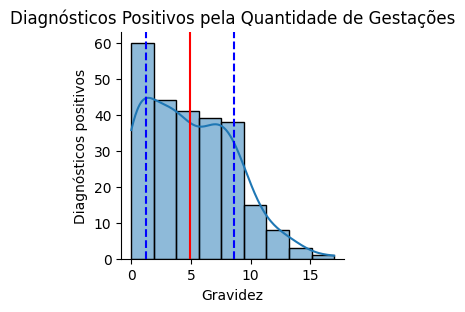

Média: 4.908
Desvio padrão: 3.701


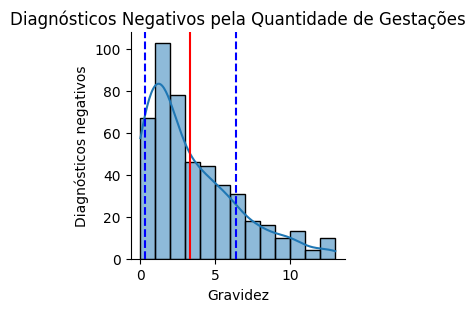

Média: 3.32
Desvio padrão: 3.027


In [ ]:
plotDisplotPositive('Pregnancies', 'Diagnósticos Positivos pela Quantidade de Gestações', 'Gravidez')
plotDisplotNegative('Pregnancies', 'Diagnósticos Negativos pela Quantidade de Gestações', 'Gravidez')


É possível observar que embora a quantidade de gestações por mulher foi decaindo gradativamente, a quantidade de pessoas com diabetes apresentou uma certa estabilidade, podendo supor que a quantidade de gestações possui uma considerável relação com o aumento da probabilidade de adquirir diabetes.

**2) Gráficos de pizza relacionando quantidade de gravidez e a porcentagem de diagnósticos**

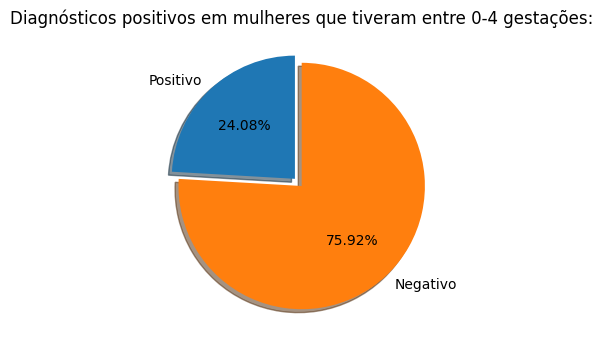

Quantidade de Diabeticos: 72
Quantidade de Nâo Diabeticos: 227


In [ ]:
plotPie('Pregnancies', 0, 4, 'Diagnósticos positivos em mulheres que tiveram entre 0-4 gestações:')

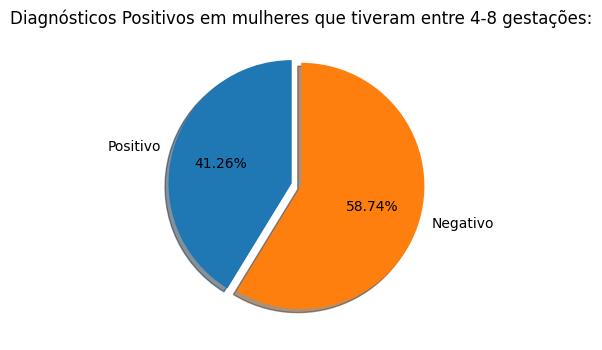

Quantidade de Diabeticos: 59
Quantidade de Nâo Diabeticos: 84


In [ ]:
plotPie('Pregnancies', 4, 8, 'Diagnósticos Positivos em mulheres que tiveram entre 4-8 gestações:')

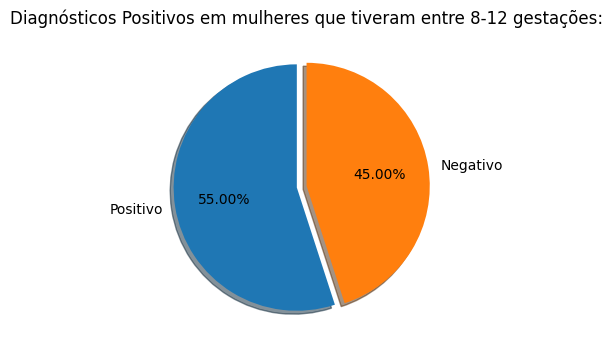

Quantidade de Diabeticos: 33
Quantidade de Nâo Diabeticos: 27


In [ ]:
plotPie('Pregnancies', 8, 12, 'Diagnósticos Positivos em mulheres que tiveram entre 8-12 gestações:')

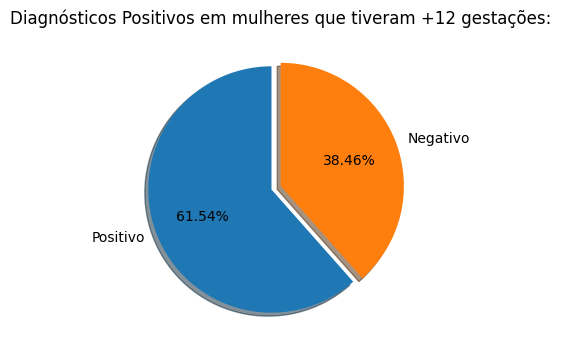

Quantidade de Diabeticos: 8
Quantidade de Nâo Diabeticos: 5


In [ ]:
plotPie('Pregnancies', 12, 20, 'Diagnósticos Positivos em mulheres que tiveram +12 gestações:')

### Análise de dados - Glicose

**1) Gráficos de barras relacionando taxa de glicose e a contagem da diagnósticos**

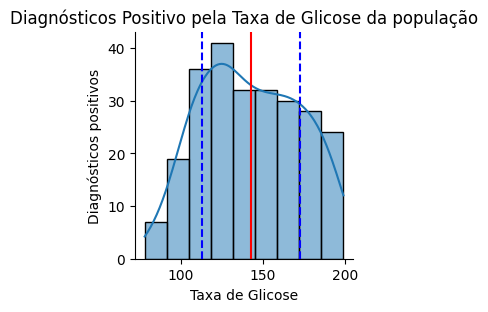

Média: 142.61
Desvio padrão: 29.998


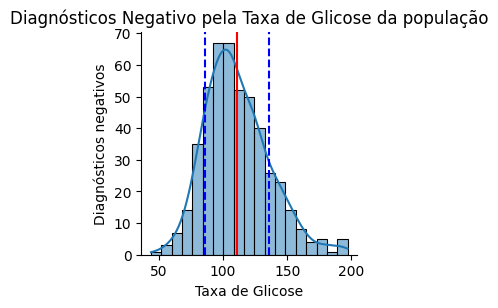

Média: 111.017
Desvio padrão: 24.984


In [ ]:
plotDisplotPositive('Glucose', 'Diagnósticos Positivo pela Taxa de Glicose da população', 'Taxa de Glicose')
plotDisplotNegative('Glucose', 'Diagnósticos Negativo pela Taxa de Glicose da população', 'Taxa de Glicose')


É possível observar que a taxa de glicose nos diabéticos é consideravelmente maior que a taxa de glicose para a população geral.

**2) Gráficos de pizza relacionando taxa de glicose e a porcentagem da diagnósticos**

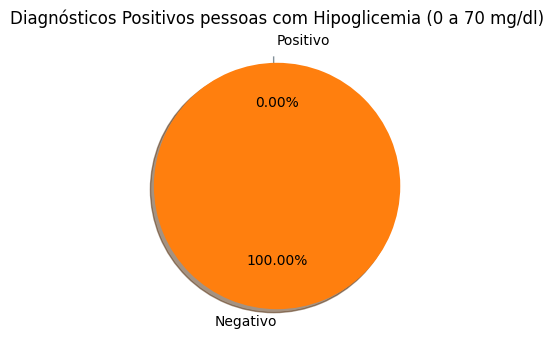

Quantidade de Diabeticos: 0
Quantidade de Nâo Diabeticos: 11


In [ ]:
plotPie('Glucose', 0, 70, 'Diagnósticos Positivos pessoas com Hipoglicemia (0 a 70 mg/dl)')

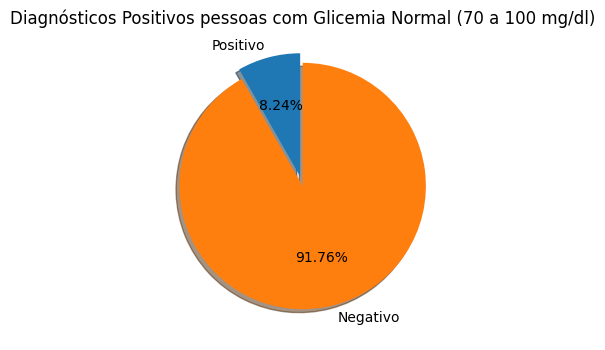

Quantidade de Diabeticos: 14
Quantidade de Nâo Diabeticos: 156


In [ ]:
plotPie('Glucose', 70, 100, 'Diagnósticos Positivos pessoas com Glicemia Normal (70 a 100 mg/dl)')

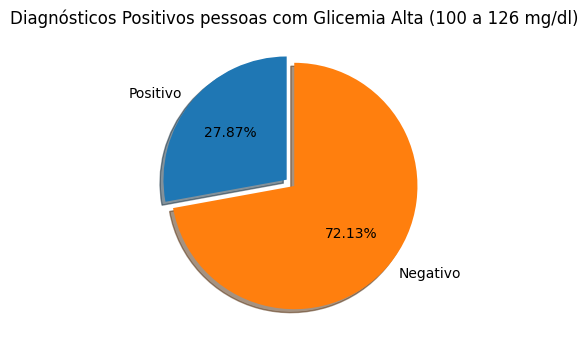

Quantidade de Diabeticos: 68
Quantidade de Nâo Diabeticos: 176


In [ ]:
plotPie('Glucose', 100, 126, 'Diagnósticos Positivos pessoas com Glicemia Alta (100 a 126 mg/dl)')

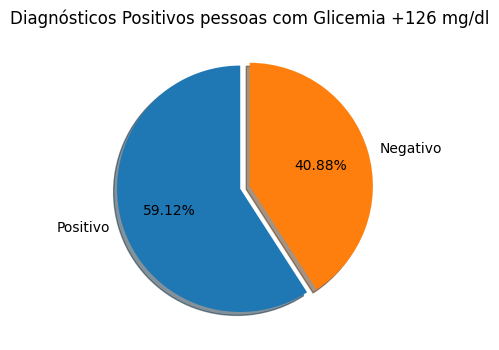

Quantidade de Diabeticos: 162
Quantidade de Nâo Diabeticos: 112


In [ ]:
plotPie('Glucose', 126, 3000, 'Diagnósticos Positivos pessoas com Glicemia +126 mg/dl')

### Análise de dados - Pressão Sanguínea

**1) Gráfico de barras relacionando pressão sanguínea e a contagem da população**

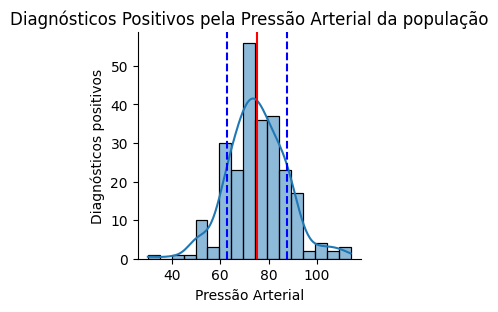

Média: 75.249
Desvio padrão: 12.267


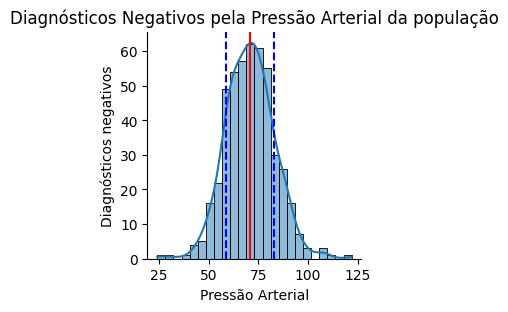

Média: 70.907
Desvio padrão: 12.162


In [ ]:

plotDisplotPositive('BloodPressure', 'Diagnósticos Positivos pela Pressão Arterial da população', 'Pressão Arterial')
plotDisplotNegative('BloodPressure', 'Diagnósticos Negativos pela Pressão Arterial da população', 'Pressão Arterial')

**2) Gráfico de barras relacionando pressão sanguínea e a porcentagem da população**

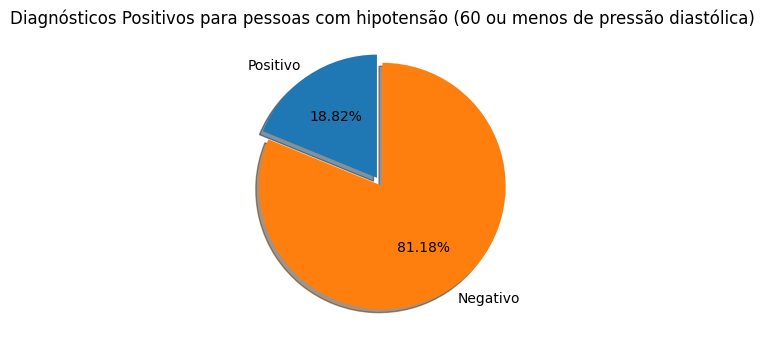

Quantidade de Diabeticos: 16
Quantidade de Nâo Diabeticos: 69


In [ ]:
plotPie('BloodPressure', 0, 60, 'Diagnósticos Positivos para pessoas com hipotensão (60 ou menos de pressão diastólica)')

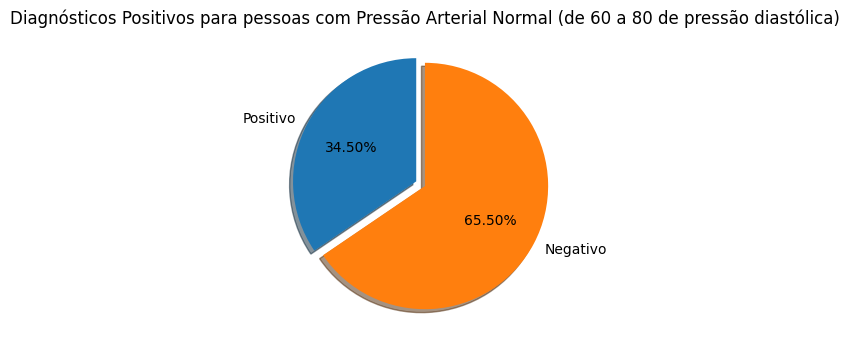

Quantidade de Diabeticos: 138
Quantidade de Nâo Diabeticos: 262


In [ ]:
plotPie('BloodPressure', 60, 80, 'Diagnósticos Positivos para pessoas com Pressão Arterial Normal (de 60 a 80 de pressão diastólica)')

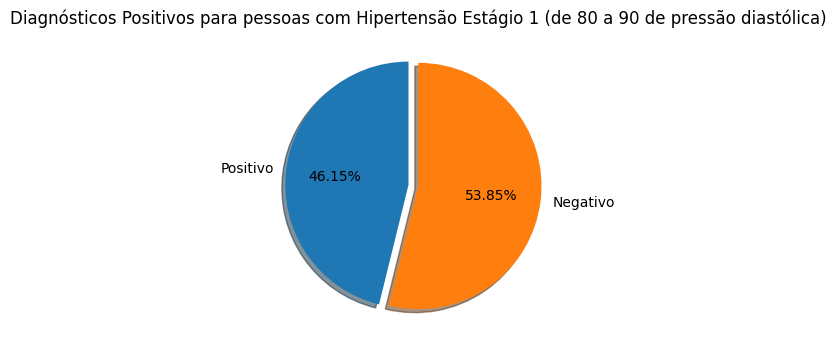

Quantidade de Diabeticos: 48
Quantidade de Nâo Diabeticos: 56


In [ ]:
plotPie('BloodPressure', 80, 90, 'Diagnósticos Positivos para pessoas com Hipertensão Estágio 1 (de 80 a 90 de pressão diastólica)')

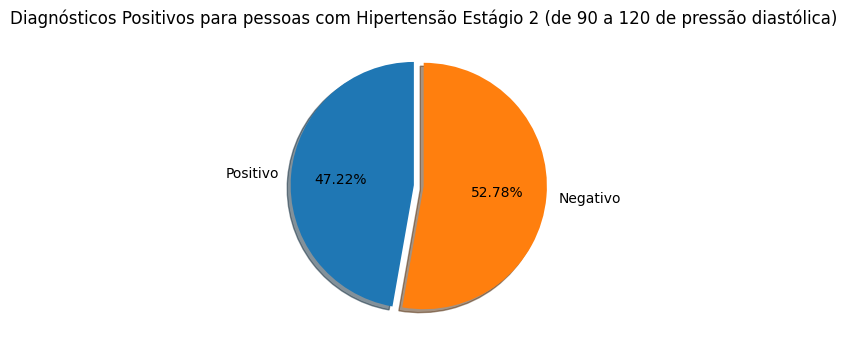

Quantidade de Diabeticos: 17
Quantidade de Nâo Diabeticos: 19


In [ ]:
plotPie('BloodPressure', 90, 120, 'Diagnósticos Positivos para pessoas com Hipertensão Estágio 2 (de 90 a 120 de pressão diastólica)')

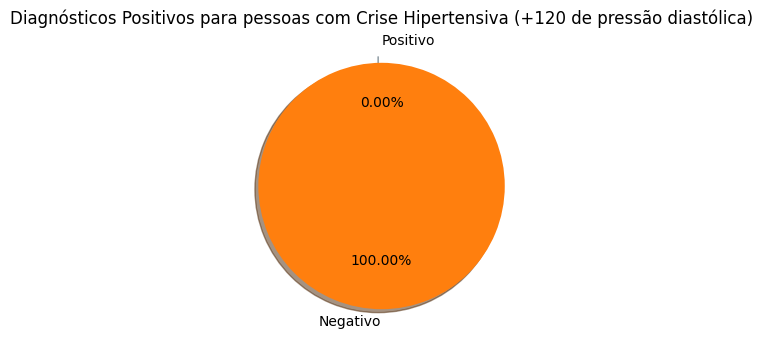

Quantidade de Diabeticos: 0
Quantidade de Nâo Diabeticos: 1


In [ ]:
plotPie('BloodPressure', 120, 3000, 'Diagnósticos Positivos para pessoas com Crise Hipertensiva (+120 de pressão diastólica)')

### Análise de dados - Espessura da Pele

**1) Gráfico de barras relacionando espessura da pele e a contagem da população**

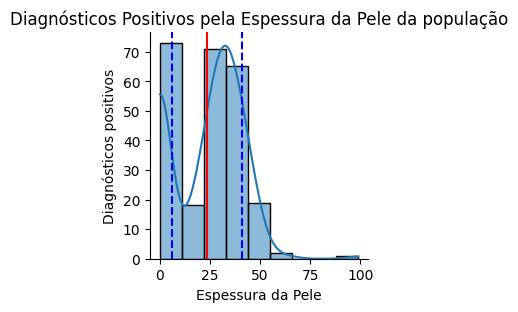

Média: 23.442
Desvio padrão: 17.318


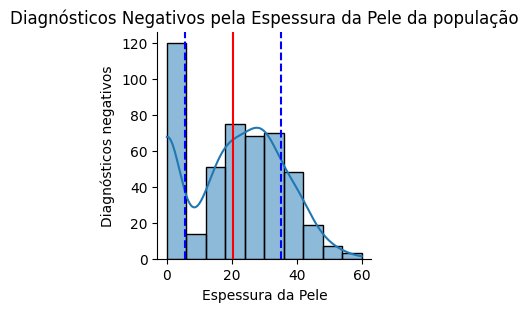

Média: 20.396
Desvio padrão: 14.709


In [ ]:
plotDisplotPositive('SkinThickness', 'Diagnósticos Positivos pela Espessura da Pele da população', 'Espessura da Pele')
plotDisplotNegative('SkinThickness', 'Diagnósticos Negativos pela Espessura da Pele da população', 'Espessura da Pele')

**2) Gráfico de pizzas relacionando espessura da pele e a porcentagem da população**

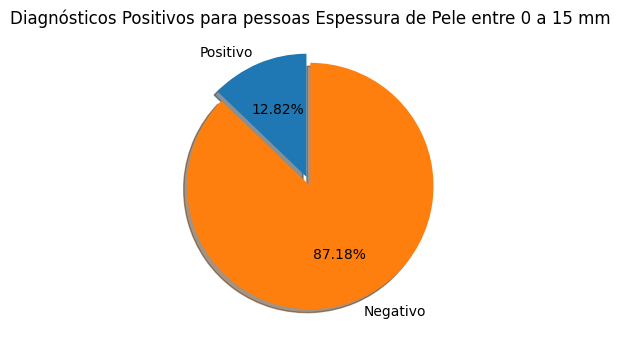

Quantidade de Diabeticos: 5
Quantidade de Nâo Diabeticos: 34


In [ ]:
plotPie('SkinThickness', 0, 15, 'Diagnósticos Positivos para pessoas Espessura de Pele entre 0 a 15 mm')

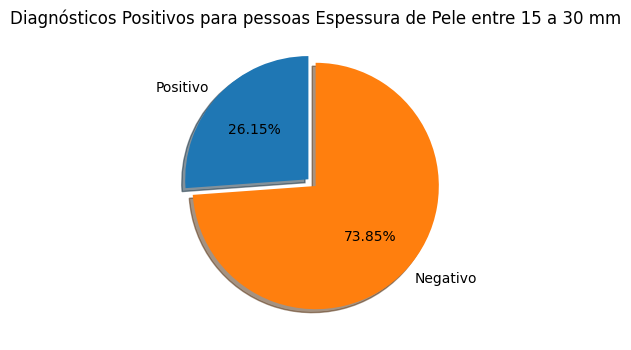

Quantidade de Diabeticos: 57
Quantidade de Nâo Diabeticos: 161


In [ ]:
plotPie('SkinThickness', 15, 30, 'Diagnósticos Positivos para pessoas Espessura de Pele entre 15 a 30 mm')

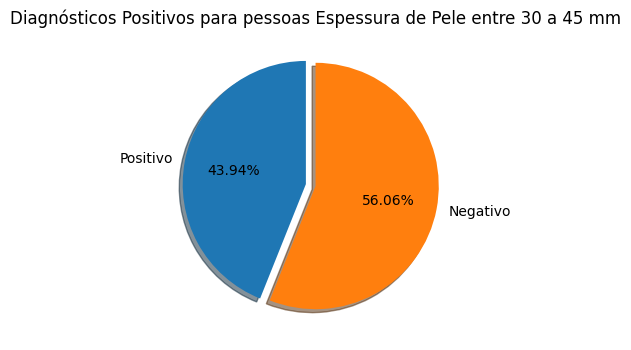

Quantidade de Diabeticos: 87
Quantidade de Nâo Diabeticos: 111


In [ ]:
plotPie('SkinThickness', 30, 45, 'Diagnósticos Positivos para pessoas Espessura de Pele entre 30 a 45 mm')

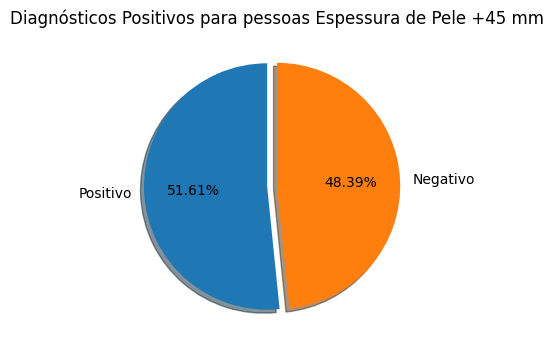

Quantidade de Diabeticos: 16
Quantidade de Nâo Diabeticos: 15


In [ ]:
plotPie('SkinThickness', 45, 100, 'Diagnósticos Positivos para pessoas Espessura de Pele +45 mm')

### Análise de Dados - Insulina


**1) Gráfico de barras relacionando taxa de insulina e a contagem da população**

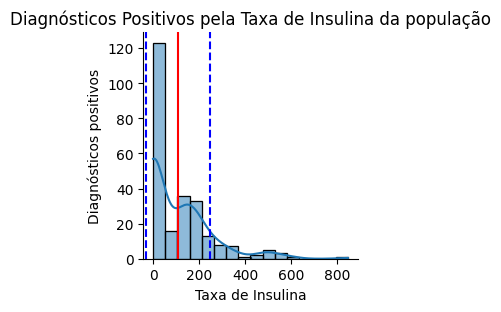

Média: 107.992
Desvio padrão: 140.707


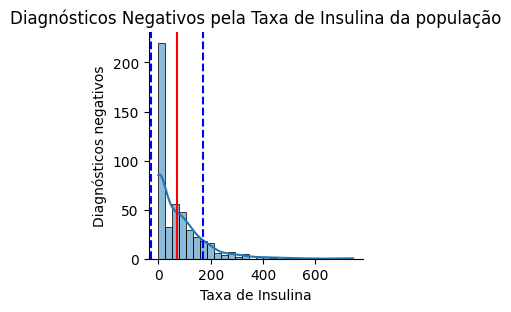

Média: 72.177
Desvio padrão: 100.112


In [ ]:
plotDisplotPositive('Insulin', 'Diagnósticos Positivos pela Taxa de Insulina da população', 'Taxa de Insulina')
plotDisplotNegative('Insulin', 'Diagnósticos Negativos pela Taxa de Insulina da população', 'Taxa de Insulina')

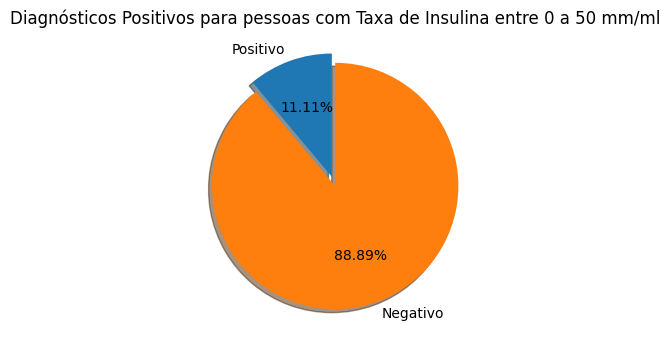

Quantidade de Diabeticos: 4
Quantidade de Nâo Diabeticos: 32


In [ ]:
plotPie('Insulin', 0, 50, 'Diagnósticos Positivos para pessoas com Taxa de Insulina entre 0 a 50 mm/ml')

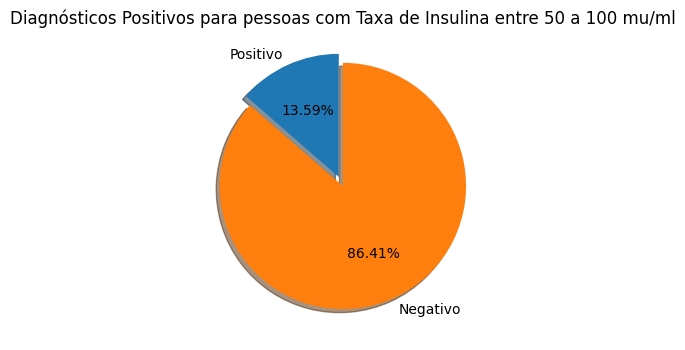

Quantidade de Diabeticos: 14
Quantidade de Nâo Diabeticos: 89


In [ ]:
plotPie('Insulin', 50, 100, 'Diagnósticos Positivos para pessoas com Taxa de Insulina entre 50 a 100 mu/ml')

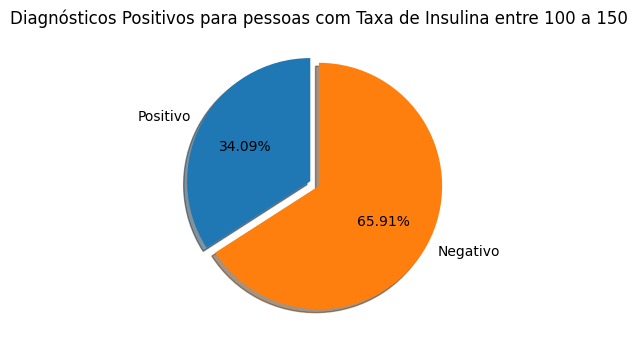

Quantidade de Diabeticos: 30
Quantidade de Nâo Diabeticos: 58


In [ ]:
plotPie('Insulin', 100, 150, 'Diagnósticos Positivos para pessoas com Taxa de Insulina entre 100 a 150')

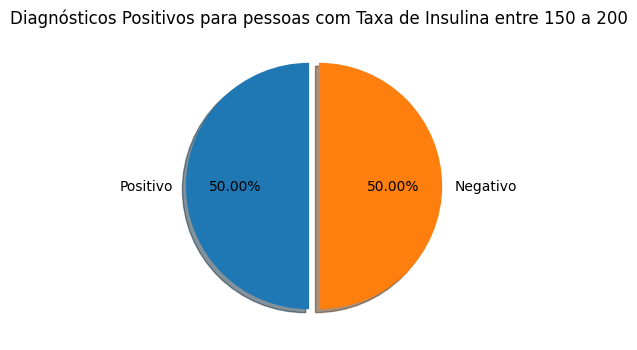

Quantidade de Diabeticos: 32
Quantidade de Nâo Diabeticos: 32


In [ ]:
plotPie('Insulin', 150, 200, 'Diagnósticos Positivos para pessoas com Taxa de Insulina entre 150 a 200')

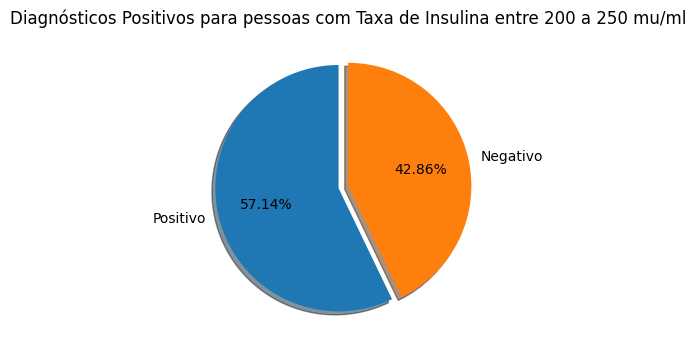

Quantidade de Diabeticos: 16
Quantidade de Nâo Diabeticos: 12


In [ ]:
plotPie('Insulin', 200, 250, 'Diagnósticos Positivos para pessoas com Taxa de Insulina entre 200 a 250 mu/ml')

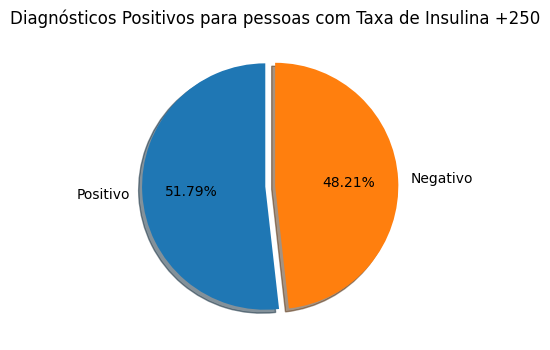

Quantidade de Diabeticos: 29
Quantidade de Nâo Diabeticos: 27


In [ ]:
plotPie('Insulin', 250, 10000, 'Diagnósticos Positivos para pessoas com Taxa de Insulina +250')

### Análise de dados - Índice de Massa Corporal

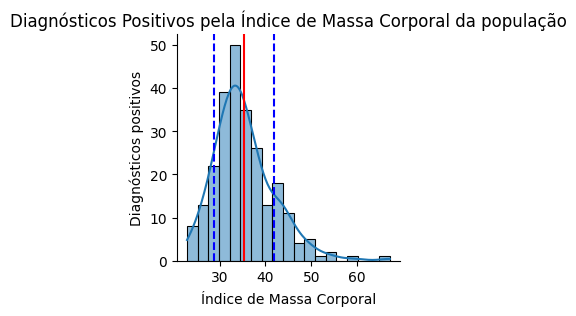

Média: 35.314
Desvio padrão: 6.577


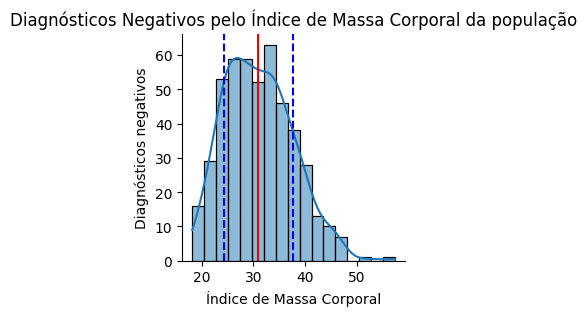

Média: 30.975
Desvio padrão: 6.564


In [ ]:
plotDisplotPositive('BMI', 'Diagnósticos Positivos pela Índice de Massa Corporal da população', 'Índice de Massa Corporal')
plotDisplotNegative('BMI', 'Diagnósticos Negativos pelo Índice de Massa Corporal da população', 'Índice de Massa Corporal')

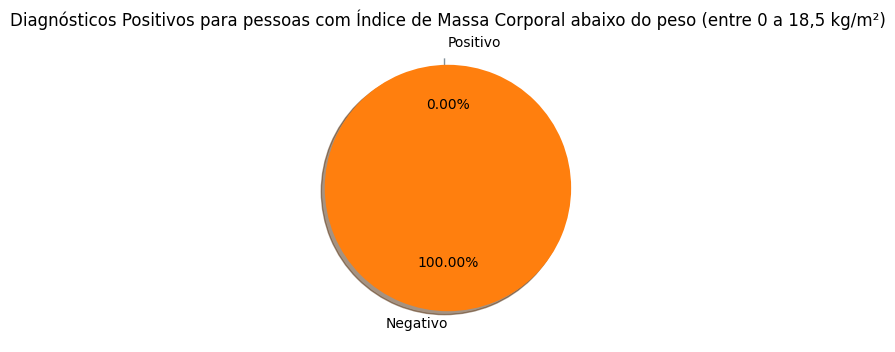

Quantidade de Diabeticos: 0
Quantidade de Nâo Diabeticos: 4


In [ ]:
plotPie('BMI', 0, 18.5, 'Diagnósticos Positivos para pessoas com Índice de Massa Corporal abaixo do peso (entre 0 a 18,5 kg/m²)')

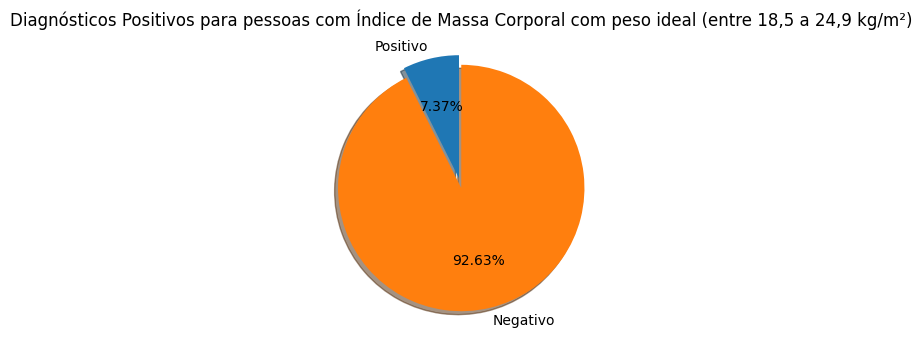

Quantidade de Diabeticos: 7
Quantidade de Nâo Diabeticos: 88


In [ ]:
plotPie('BMI', 18.5, 24.9, 'Diagnósticos Positivos para pessoas com Índice de Massa Corporal com peso ideal (entre 18,5 a 24,9 kg/m²)')

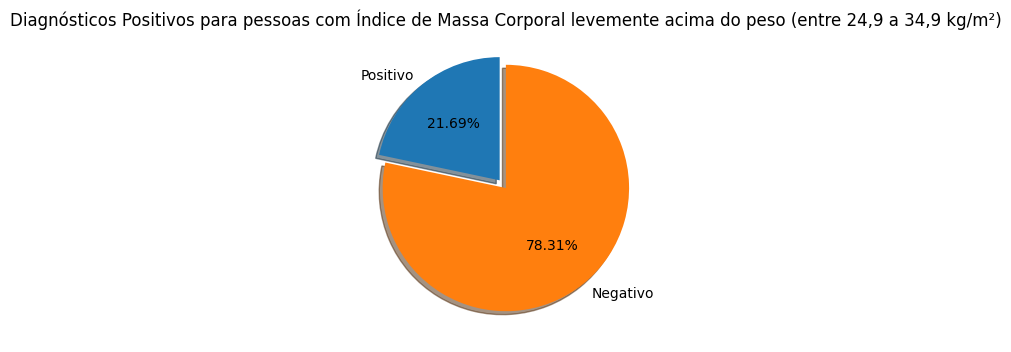

Quantidade de Diabeticos: 36
Quantidade de Nâo Diabeticos: 130


In [ ]:
plotPie('BMI', 24.9, 29.9, 'Diagnósticos Positivos para pessoas com Índice de Massa Corporal levemente acima do peso (entre 24,9 a 34,9 kg/m²)')

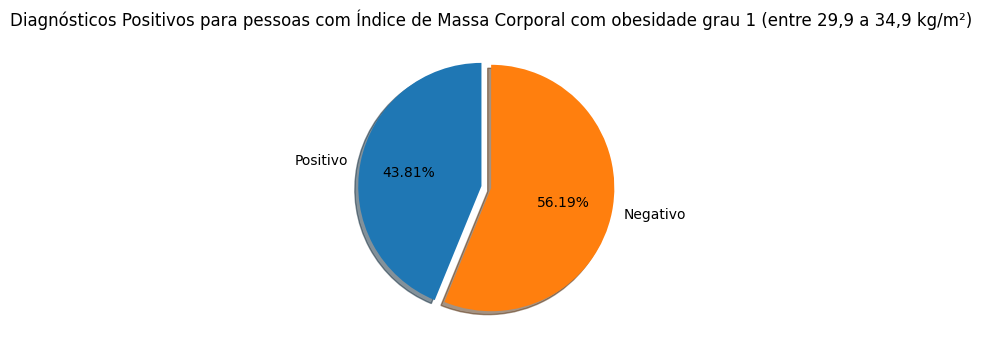

Quantidade de Diabeticos: 92
Quantidade de Nâo Diabeticos: 118


In [ ]:
plotPie('BMI', 29.9, 34.9, 'Diagnósticos Positivos para pessoas com Índice de Massa Corporal com obesidade grau 1 (entre 29,9 a 34,9 kg/m²)')

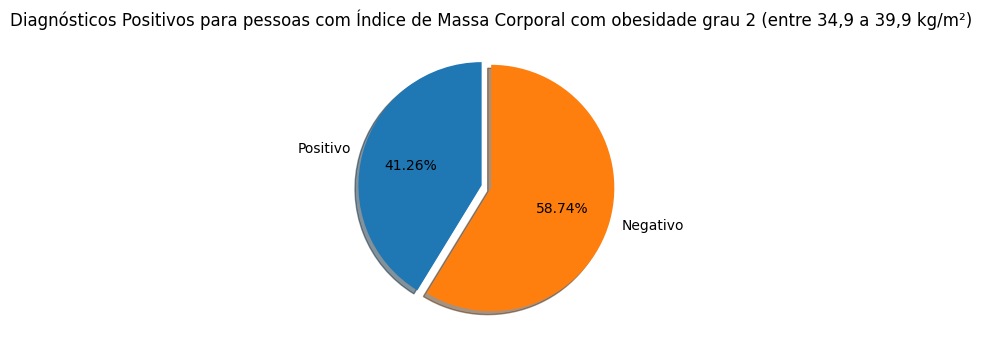

Quantidade de Diabeticos: 59
Quantidade de Nâo Diabeticos: 84


In [ ]:
plotPie('BMI', 34.9, 39.9, 'Diagnósticos Positivos para pessoas com Índice de Massa Corporal com obesidade grau 2 (entre 34,9 a 39,9 kg/m²)')

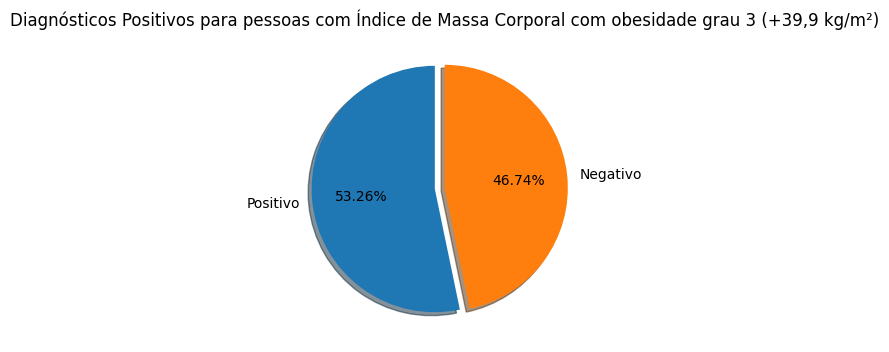

Quantidade de Diabeticos: 49
Quantidade de Nâo Diabeticos: 43


In [ ]:
plotPie('BMI', 39.9, 300, 'Diagnósticos Positivos para pessoas com Índice de Massa Corporal com obesidade grau 3 (+39,9 kg/m²)')

### Análise de dados - Função Pedigree

**1) Gráfico de barras relacionando função pedigree e a contagem da população**

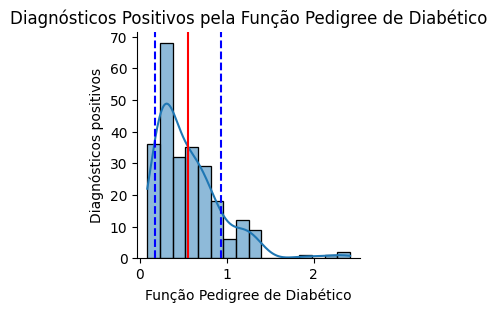

Média: 0.56
Desvio padrão: 0.378


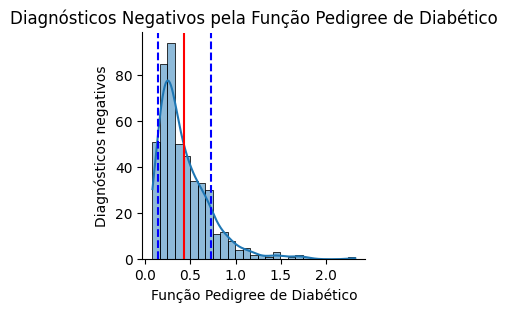

Média: 0.43
Desvio padrão: 0.296


In [ ]:
plotDisplotPositive('DiabetesPedigreeFunction', 'Diagnósticos Positivos pela Função Pedigree de Diabético', 'Função Pedigree de Diabético')
plotDisplotNegative('DiabetesPedigreeFunction', 'Diagnósticos Negativos pela Função Pedigree de Diabético', 'Função Pedigree de Diabético')

**2) Gráfico de barras relacionando função pedigree e a porcentagem da população**

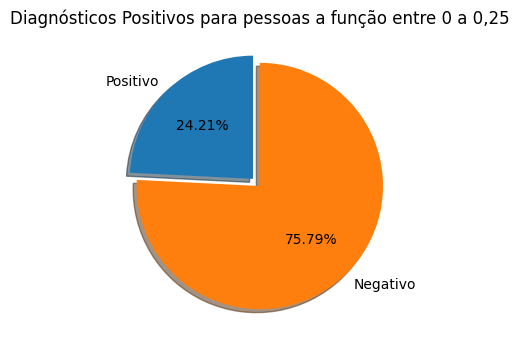

Quantidade de Diabeticos: 46
Quantidade de Nâo Diabeticos: 144


In [ ]:
plotPie('DiabetesPedigreeFunction', 0, 0.25, 'Diagnósticos Positivos para pessoas a função entre 0 a 0,25')

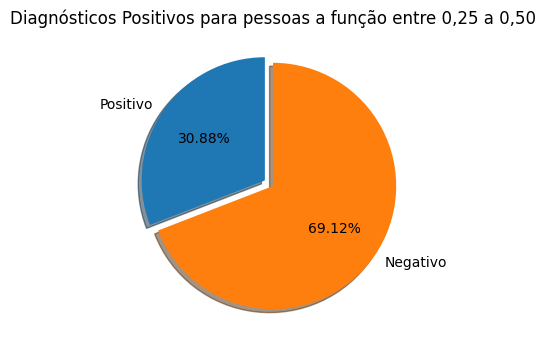

Quantidade de Diabeticos: 84
Quantidade de Nâo Diabeticos: 188


In [ ]:
plotPie('DiabetesPedigreeFunction', 0.25, 0.5, 'Diagnósticos Positivos para pessoas a função entre 0,25 a 0,50')

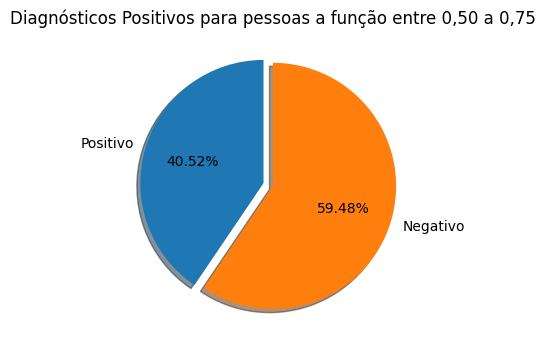

Quantidade de Diabeticos: 62
Quantidade de Nâo Diabeticos: 91


In [ ]:
plotPie('DiabetesPedigreeFunction', 0.5, 0.75, 'Diagnósticos Positivos para pessoas a função entre 0,50 a 0,75')

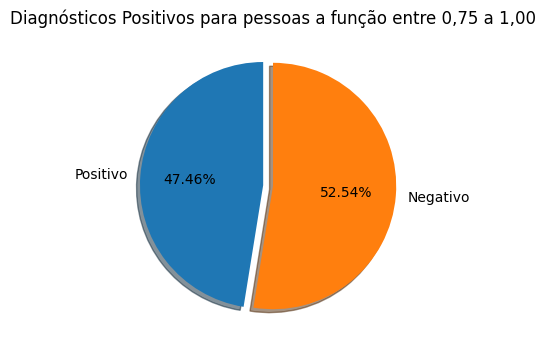

Quantidade de Diabeticos: 28
Quantidade de Nâo Diabeticos: 31


In [ ]:
plotPie('DiabetesPedigreeFunction', 0.75, 1, 'Diagnósticos Positivos para pessoas a função entre 0,75 a 1,00')

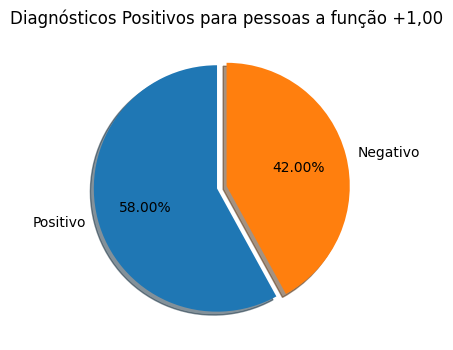

Quantidade de Diabeticos: 29
Quantidade de Nâo Diabeticos: 21


In [ ]:
plotPie('DiabetesPedigreeFunction', 1, 3.00, 'Diagnósticos Positivos para pessoas a função +1,00')

### Análise de dados - Idade

**1) Gráfico de barras relacionando a idade e a contagem da população**

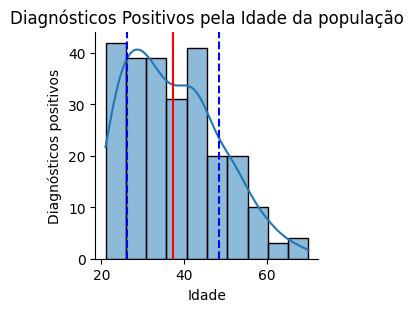

Média: 37.341
Desvio padrão: 11.1


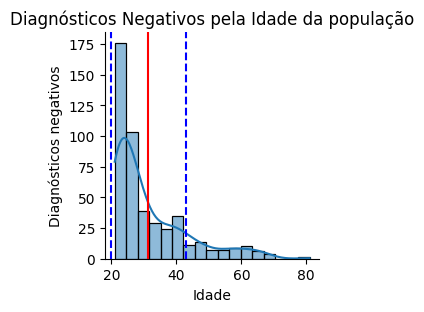

Média: 31.259
Desvio padrão: 11.549


In [ ]:
plotDisplotPositive('Age', 'Diagnósticos Positivos pela Idade da população', 'Idade')
plotDisplotNegative('Age', 'Diagnósticos Negativos pela Idade da população', 'Idade')


**2) Gráfico de barras relacionando a idade e a porcentagem da população**

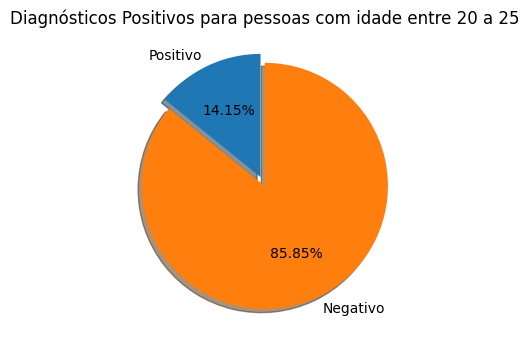

Quantidade de Diabeticos: 29
Quantidade de Nâo Diabeticos: 176


In [ ]:
plotPie('Age', 20, 25, 'Diagnósticos Positivos para pessoas com idade entre 20 a 25')

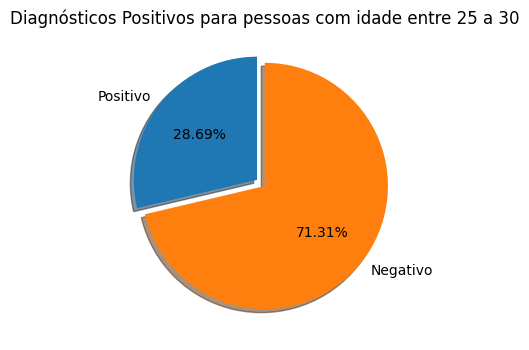

Quantidade de Diabeticos: 35
Quantidade de Nâo Diabeticos: 87


In [ ]:
plotPie('Age', 25, 30, 'Diagnósticos Positivos para pessoas com idade entre 25 a 30')

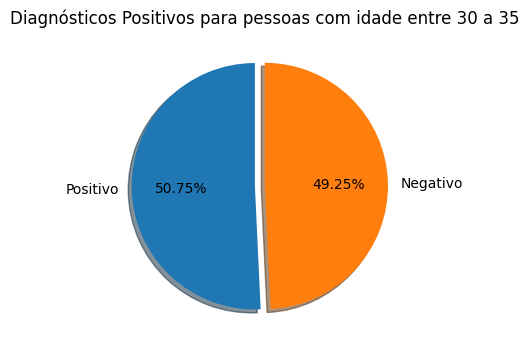

Quantidade de Diabeticos: 34
Quantidade de Nâo Diabeticos: 33


In [ ]:
plotPie('Age', 30, 35, 'Diagnósticos Positivos para pessoas com idade entre 30 a 35')

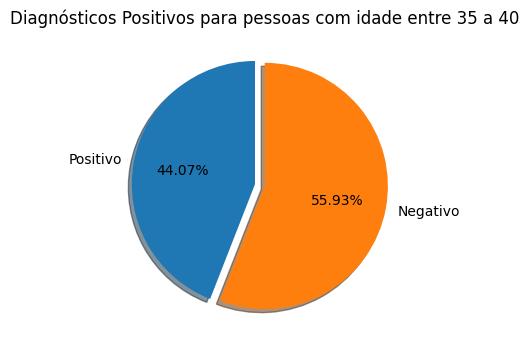

Quantidade de Diabeticos: 26
Quantidade de Nâo Diabeticos: 33


In [ ]:
plotPie('Age', 35, 40, 'Diagnósticos Positivos para pessoas com idade entre 35 a 40')

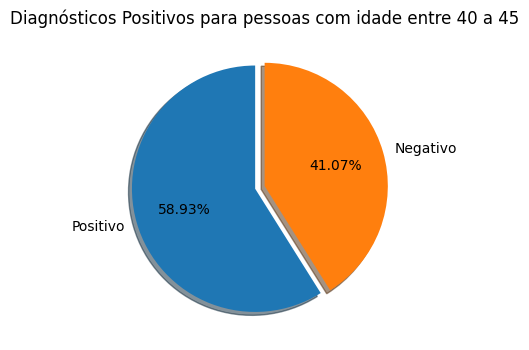

Quantidade de Diabeticos: 33
Quantidade de Nâo Diabeticos: 23


In [ ]:
plotPie('Age', 40, 45, 'Diagnósticos Positivos para pessoas com idade entre 40 a 45')

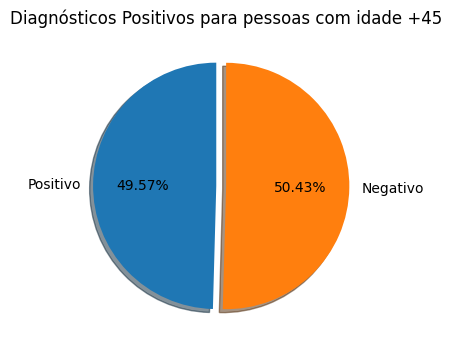

Quantidade de Diabeticos: 57
Quantidade de Nâo Diabeticos: 58


In [ ]:
plotPie('Age', 45, 100, 'Diagnósticos Positivos para pessoas com idade +45')

É possível observar que quanto maior a idade, maior a probabilidade de adquirir diabetes.

#**Previsão e Classificação**

##Elaboração própria do Classificador Naive Bayes Gaussiano

In [ ]:

gauss_pdf = lambda x, mu, sig2: ( np.exp( -((x-mu)**2)/(2*sig2) )/((2*np.pi*sig2)**0.5) )     #Fdp Gaussiana



def self_made_GNB(features_train, features_test, outcomes_train):             #Naive Bayes Gaussiano de elaboração própria

  features_train_neg = features_train[outcomes_train == 0]
  features_train_pos = features_train[outcomes_train == 1]

  #Considerando classes equiprováveis
  neg_prob = 0.50
  pos_prob = 0.50

  num_columns = features_train.shape[1]
  gauss_par_neg = []
  gauss_par_pos = []

  #Calculando os valores de mu e sig2 para cada coluna das amostras de resultados negativo e positivo
  for i in range(num_columns):
    column_name = features_train_neg.columns[i]
    gauss_par_neg.append((features_train_neg.mean()[column_name], features_train_neg.var()[column_name]))
    gauss_par_pos.append((features_train_pos.mean()[column_name], features_train_pos.var()[column_name]))


  test_size = features_test.shape[0]

  pred = []

  #Calculando as probabilidades
  for i in range(test_size):
    prob1 = neg_prob
    prob2 = pos_prob
    for j in range(num_columns):
      prob1 = prob1 * gauss_pdf(features_test.iat[i, j], *gauss_par_neg[j])
      prob2 = prob2 * gauss_pdf(features_test.iat[i, j], *gauss_par_pos[j])

    #Regra de decisão MAP para classificar
    if(prob1 > prob2):
      pred.append(0)
    else:
      pred.append(1)

  outcomes_predicted = {"Outcomes": pred}
  outcomes_predicted = pd.DataFrame(data = outcomes_predicted)

  return outcomes_predicted




## Funções gerais

### Separação Treino - Teste

In [ ]:
def train_test(dFrame):
  features = dFrame.drop(columns = "Outcome")
  outcomes = dFrame["Outcome"]

  rnd_seed = 41
  train_ratio = 0.7       #Proporção 70:30

  return train_test_split(features, outcomes, random_state = rnd_seed, train_size = train_ratio)

### Resultados das métricas

In [ ]:
def Metrics_Results(outcomes_expected, outcomes_predicted):

  conf_mat = confusion_matrix(outcomes_expected, outcomes_predicted)
  print(pd.DataFrame(conf_mat, index = ["Verdadeiro Negativo", "Verdadeiro Positivo"], columns = ["Previsto Negativo", "Previsto Positivo"]), "\n\n")
  ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ["Diagnóstico Negativo", "Diagnóstico Positivo"]).plot(cmap = 'Blues')
  plt.show()

  print("\n\n\n\n", classification_report(outcomes_expected, outcomes_predicted))

  RocCurveDisplay.from_predictions(outcomes_expected, outcomes_predicted)
  plt.show()


### Classificação usando modelos Naive Bayes Gaussiano

In [ ]:
def Classification(dFrame):

  features_train, features_test, outcomes_train, outcomes_test = train_test(dFrame)

  #Previsões do classificador com classes não equiprováveis
  GNB = GaussianNB()
  GNB.fit(features_train, outcomes_train)
  outcomes_predicted = GNB.predict(features_test)
  print("\t\tResultados do classificador com classes não equiprováveis\n")
  Metrics_Results(outcomes_test, outcomes_predicted)

  print("\n\n\n\n\n\n")

  #Previsões do classificador com classes equiprováveis
  outcomes_predicted = self_made_GNB(features_train, features_test, outcomes_train)
  print("\t\tResultados do classificador com classes equiprováveis\n")
  Metrics_Results(outcomes_test, outcomes_predicted)

  return features_train, features_test, outcomes_train, outcomes_test, GNB

## Primeiro Experimento (antes da seleção de parâmetros)

		Resultados do classificador com classes não equiprováveis

                     Previsto Negativo  Previsto Positivo
Verdadeiro Negativo                125                 28
Verdadeiro Positivo                 35                 43 




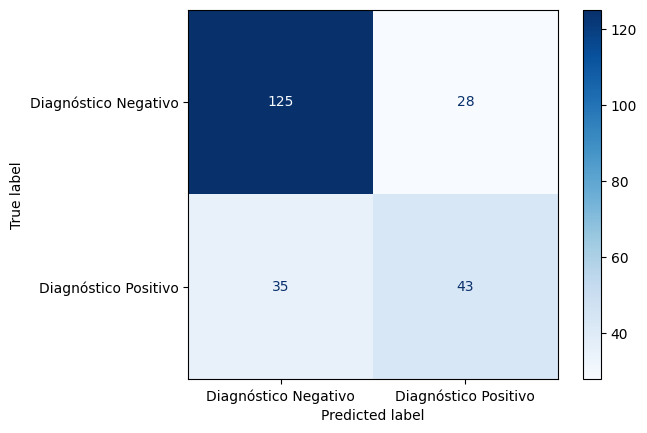





               precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       153
         1.0       0.61      0.55      0.58        78

    accuracy                           0.73       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



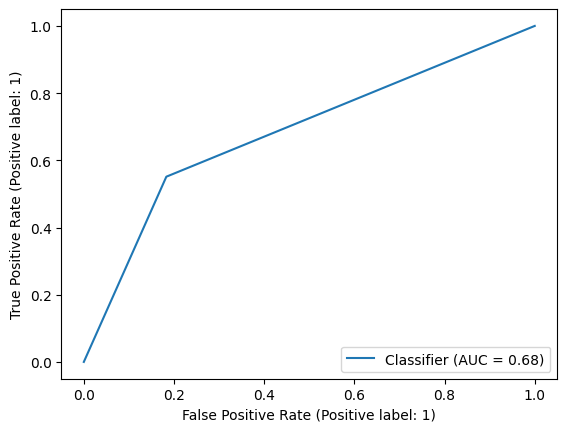








		Resultados do classificador com classes equiprováveis

                     Previsto Negativo  Previsto Positivo
Verdadeiro Negativo                113                 40
Verdadeiro Positivo                 27                 51 




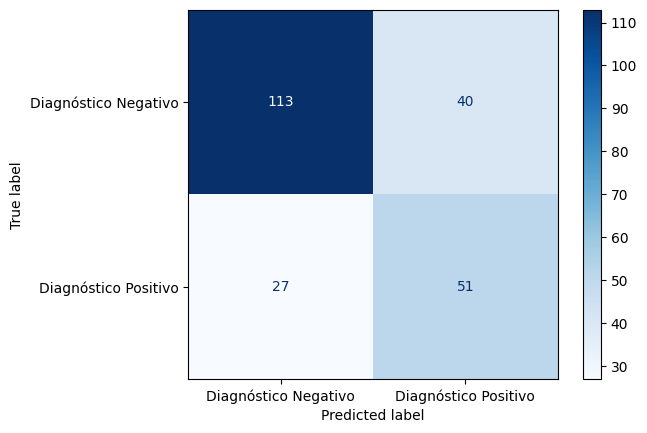





               precision    recall  f1-score   support

         0.0       0.81      0.74      0.77       153
         1.0       0.56      0.65      0.60        78

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231



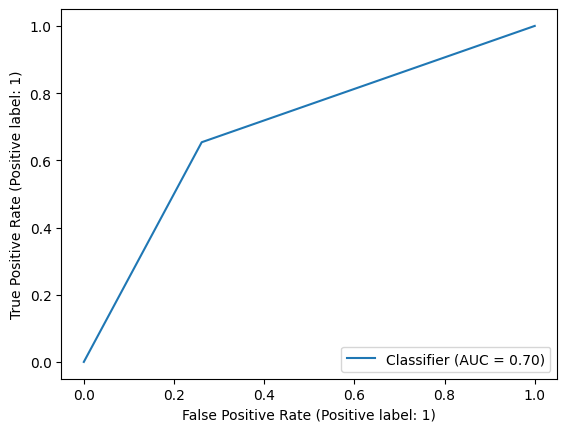

In [ ]:
features_train, features_test, outcomes_train, outcomes_test, GNB = Classification(dFrame)




## Análise da importância dos parâmetros

Feature 0: Pregnancies, Score: 0.02158
Feature 1: Glucose, Score: 0.06845
Feature 2: BloodPressure, Score: -0.02339
Feature 3: SkinThickness, Score: -0.02138
Feature 4: Insulin, Score: -0.00673
Feature 5: BMI, Score: 0.00524
Feature 6: DiabetesPedigreeFunction, Score: 0.00326
Feature 7: Age, Score: -0.00541


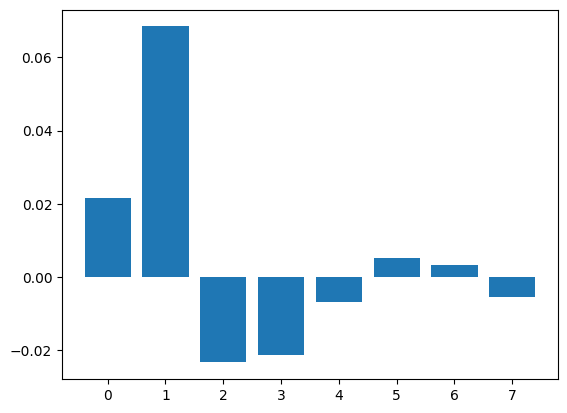

In [ ]:
#Permutation Feature Importance para a métrica de F1-Score Médio
imps = permutation_importance(GNB, features_test, outcomes_test, scoring = 'precision_macro', n_repeats = 100)
scores = imps.importances_mean

for i,v in enumerate(scores):
 print('Feature %d: %s, Score: %.5f' % (i, dFrame.columns[i],v))

plt.bar([x for x in range(len(scores))], scores)
plt.show()


## Seleção dos 4 parâmetros mais importantes

In [ ]:
important_ind = scores.argsort()[::-1]
important_ind = np.append(important_ind[:4], 8)   #Adicionando o índice da última coluna com os resultados

dFrame_4f = dFrame.iloc[:, important_ind]

print(dFrame_4f)

     Glucose  Pregnancies   BMI  DiabetesPedigreeFunction  Outcome
0      148.0          6.0  33.6                     0.627      1.0
1       85.0          1.0  26.6                     0.351      0.0
2      183.0          8.0  23.3                     0.672      1.0
3       89.0          1.0  28.1                     0.167      0.0
4      137.0          0.0  43.1                     2.288      1.0
..       ...          ...   ...                       ...      ...
763    101.0         10.0  32.9                     0.171      0.0
764    122.0          2.0  36.8                     0.340      0.0
765    121.0          5.0  26.2                     0.245      0.0
766    126.0          1.0  30.1                     0.349      1.0
767     93.0          1.0  30.4                     0.315      0.0

[768 rows x 5 columns]


## Segundo Experimento (após a seleção dos parâmetros)

		Resultados do classificador com classes não equiprováveis

                     Previsto Negativo  Previsto Positivo
Verdadeiro Negativo                131                 22
Verdadeiro Positivo                 36                 42 




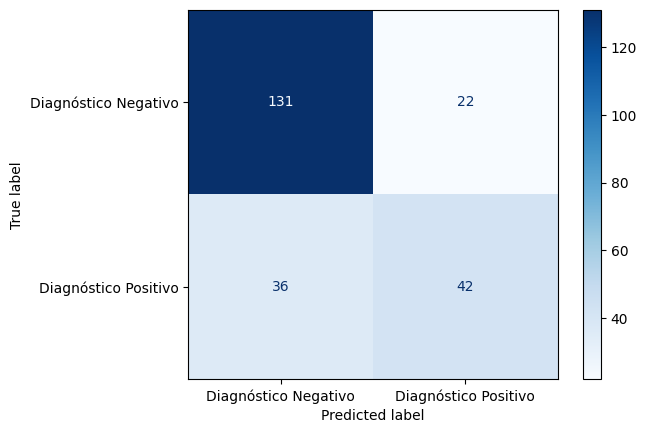





               precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       153
         1.0       0.66      0.54      0.59        78

    accuracy                           0.75       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



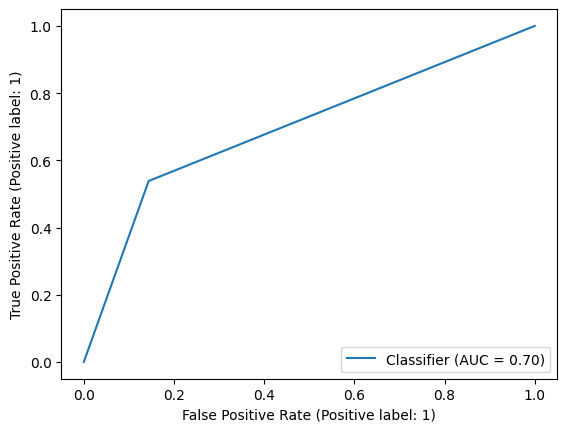








		Resultados do classificador com classes equiprováveis

                     Previsto Negativo  Previsto Positivo
Verdadeiro Negativo                120                 33
Verdadeiro Positivo                 21                 57 




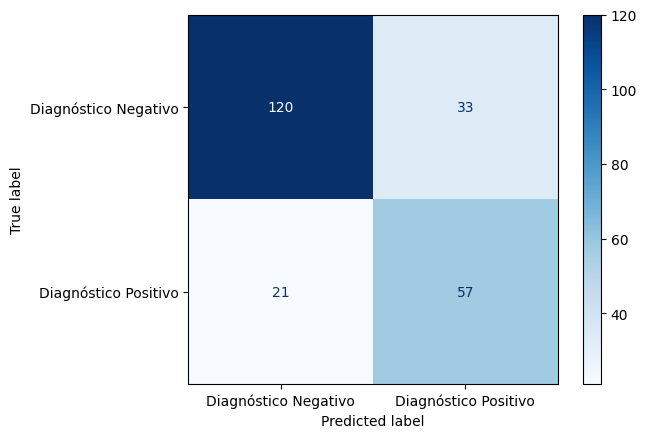





               precision    recall  f1-score   support

         0.0       0.85      0.78      0.82       153
         1.0       0.63      0.73      0.68        78

    accuracy                           0.77       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.78      0.77      0.77       231



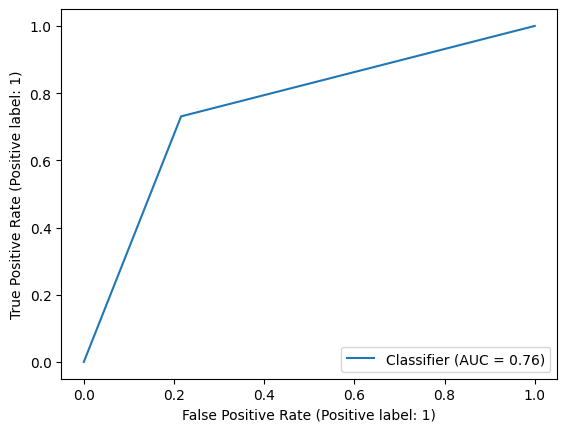

In [ ]:
ret = Classification(dFrame_4f)